<center><h1>INF-552 Lab 1</h1></center>


Name: Lingduo Luo

Github Username: Lingduo-L

USC ID: 4403994468

(b) Preprocessing

In [2]:
import pandas as pd
import numpy as np

from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import *
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import GridSearchCV

#KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import DistanceMetric

#from sklearn.datasets import load_iris


In [9]:
df = pd.read_csv('../data/column_2C.dat', sep = " ", header=None, 
names=["pelvic incidence","pelvic tilt","lumbar lordosis angle","sacral slope","pelvic radius","grade of spondylolisthesis","class"])
df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


(b)i  Make scatterplots of the independent variables in the dataset.

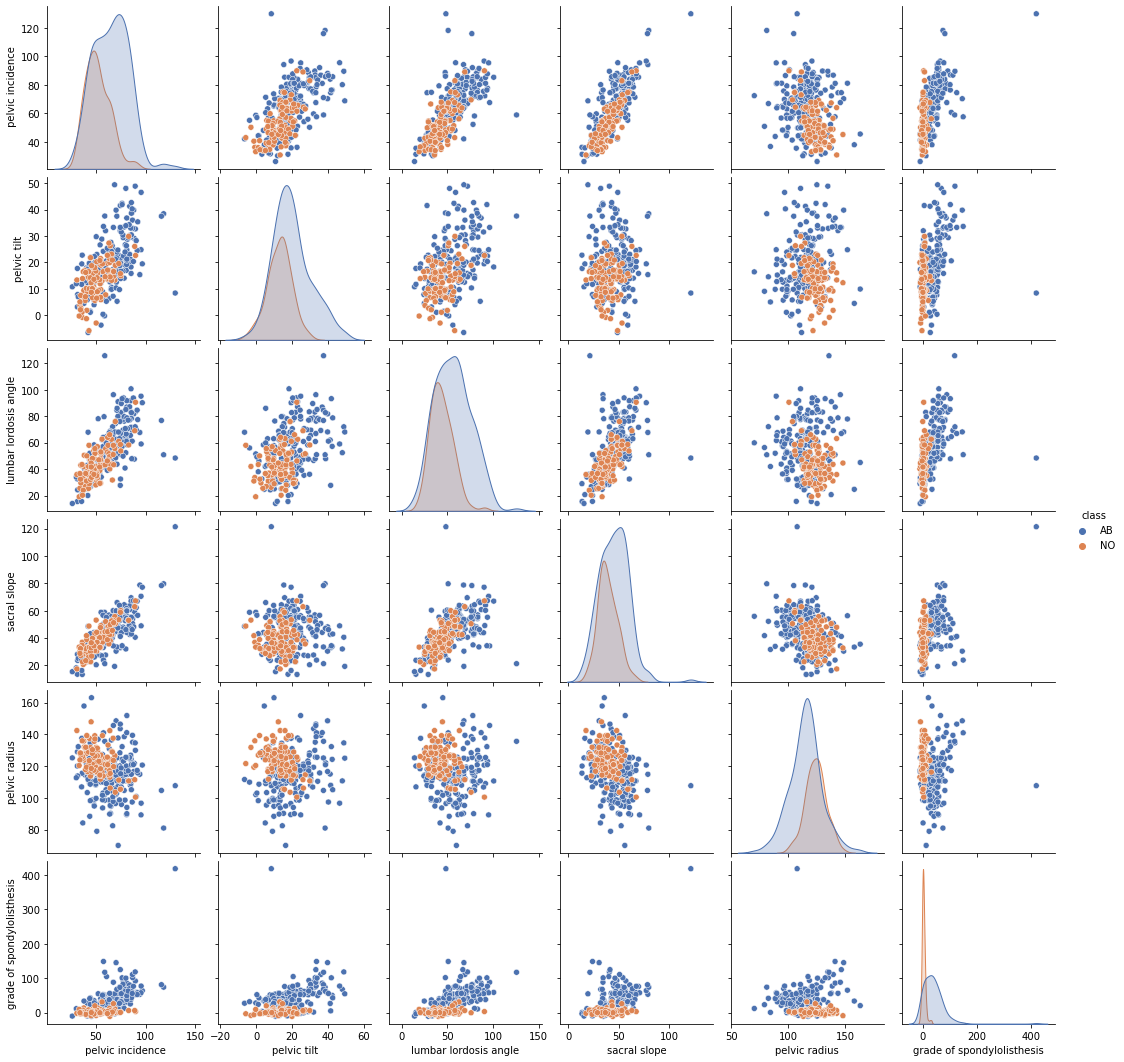

In [29]:
sns.pairplot(df, vars=df.columns[:-1], hue="class",palette="deep")
plt.show()

(b)ii Make boxplots for each of the independent variables.

<AxesSubplot:xlabel='class', ylabel='grade of spondylolisthesis'>

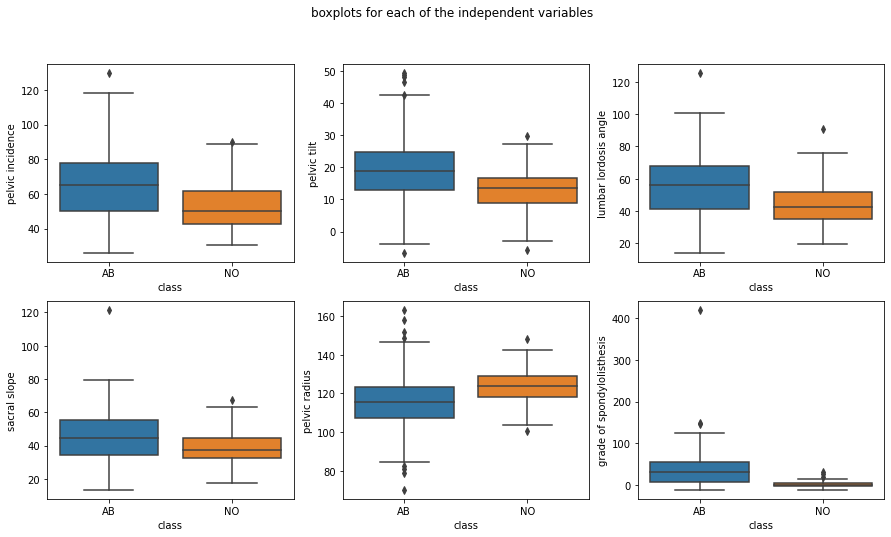

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

fig.suptitle('boxplots for each of the independent variables')

sns.boxplot(ax=axes[0, 0], data=df, x='class', y='pelvic incidence')
sns.boxplot(ax=axes[0, 1], data=df, x='class', y='pelvic tilt')
sns.boxplot(ax=axes[0, 2], data=df, x='class', y='lumbar lordosis angle')
sns.boxplot(ax=axes[1, 0], data=df, x='class', y='sacral slope')
sns.boxplot(ax=axes[1, 1], data=df, x='class', y='pelvic radius')
sns.boxplot(ax=axes[1, 2], data=df, x='class', y='grade of spondylolisthesis')


In [80]:
# build a dataframe

pd.DataFrame(columns=["pelvic incidence", "pelvic tilt","lumbar lordosis angle","sacral slope","pelvic radius","grade of spondylolisthesis","class"])
#f = pd.DataFrame(df)

df2 = pd.DataFrame({'pelvic incidence' : df['pelvic incidence'],
                   'pelvic tilt' : df['pelvic tilt'],
                   'lumbar lordosis angle' : df['lumbar lordosis angle'],
                   'sacral slope' : df['sacral slope'],
                    'pelvic radius' : df['pelvic radius'],
                    'grade of spondylolisthesis' : df['grade of spondylolisthesis'],
                    'class' : df['class'],
                   })

df2=df2.replace('AB', 1).replace('NO',0)
df2

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


(b)iii Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [82]:
# build testing and training data sets
df1=df2.loc[df2['class']==1]
df1
df0=df2.loc[df2['class']==0]
df0

#training sets
train1=df1.iloc[:140]
train0=df0.iloc[:70]

training=pd.concat([train1, train0])

#testing sets
test1=df1.iloc[140:]
test0=df0.iloc[70:]

testing=pd.concat([test1, test0])
testing

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
140,69.56,15.40,74.44,54.16,105.07,29.70,1
141,89.50,48.90,72.00,40.60,134.63,118.35,1
142,85.29,18.28,100.74,67.01,110.66,58.88,1
143,60.63,20.60,64.54,40.03,117.23,104.86,1
144,60.04,14.31,58.04,45.73,105.13,30.41,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [83]:
# build testing and training data sets
X_testing = testing.drop(columns=['class'])
X_testing.head()

y_testing = testing['class'].values
y_testing[:]

X_training = training.drop(columns=['class'])
X_training.head()

y_training = training['class'].values
y_training[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

(c) i Write code for k-nearest neighbors with Euclidean metric

In [84]:
# set the n_neighbors = 6
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_training,y_training)
knn.predict(X_testing)[0:5]
knn_predict=knn.predict(X_testing)
knn_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [85]:
# accuracy
knn.score(X_testing, y_testing)

0.94

In [86]:
# Cross-validation of results

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=9)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_testing, y_testing, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

# find the best n_neighbors based on cross-validation of results

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_training, y_training)

#check top performing n_neighbors value
k = knn_gscv.best_params_
print(k)

#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

# According to the results of cross-validation, the best results are obtained when K takes the value of 13

[1.   1.   0.95 0.95 1.  ]
cv_scores mean:0.9800000000000001
{'n_neighbors': 13}


0.8238095238095238

(c) ii

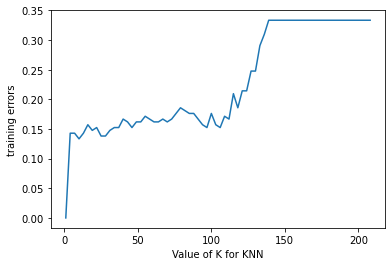

In [87]:
# Plot train and test errors

# training error
k_range = range(1, 210, 3)
# k_range = range(1, 33, 3)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_training,y_training)
    knn_predict_train=knn.predict(X_training)
    
    scores = knn.score(X_training, y_training)
    k_scores.append((1-scores.mean()))

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('training errors')
plt.show()

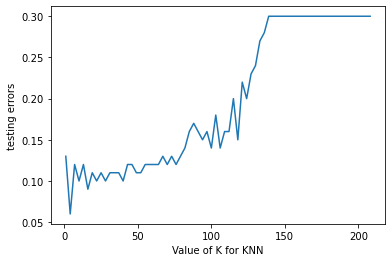

In [88]:
# testing error
k_range = range(1, 210, 3)
# k_range = range(1, 33, 3)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_training,y_training)
    knn_predict_train=knn.predict(X_testing)
    
    scores = knn.score(X_testing, y_testing)
    k_scores.append((1-scores.mean()))

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('testing errors')
plt.show()

# According to the test error, it is known that the test error is minimum when k=4. Therefore, choose k = 4

(c)ii Calculate the confusion matrix, true positive rate, true negative rate

In [89]:
#confusion matrix

confusion_matrix(y_testing, knn_predict)

array([[25,  5],
       [ 1, 69]], dtype=int64)

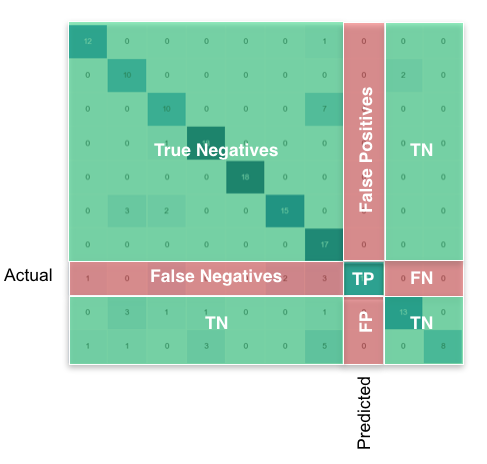

In [90]:
#true negative rate, false positive rate, false negative rate, true positive rate, 
tn, fp, fn, tp = confusion_matrix(y_testing, knn_predict).ravel()
print(tn, fp, fn, tp)

#TP/actual yes
true_positive_rate = 69/(69+1)
print(true_positive_rate)

#TN/actual no
true_negative_rate = 25/(25+5)
print(true_negative_rate)

25 5 1 69
0.9857142857142858
0.8333333333333334


In [91]:
#precision
# precision_score(y_testing, knn_predict, average=None)
precision_score(y_testing, knn_predict)

0.9324324324324325

In [92]:
#F1-score when k = 6
f1_score(y_testing, knn_predict)

0.9583333333333333

(c) iii

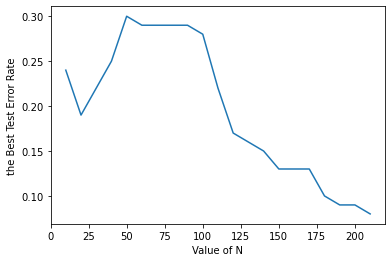

In [97]:
df1=df2.loc[df['class']=='AB']
df1
df0=df2.loc[df['class']=='NO']
df0
bter = [] # the best test error rate
N_range = range(10, 211, 10)

for N in N_range:

    df1_2=df2.loc[df2['class']==1]
    df0_2=df2.loc[df2['class']==0]
        
    train1_2=df1_2.iloc[:int(2*N/3)]
    train0_2=df0_2.iloc[:int(N/3)]
    training_2=pd.concat([train1_2, train0_2])
    
    X_training_2 = training_2.drop(columns=['class'])
    y_training_2 = training_2['class'].values
    
    k2_range = range(1, (N+1), 5)
    error = [] #error
    
    for k2 in k2_range:

        knn2 = KNeighborsClassifier(n_neighbors=k2) 
        knn2.fit(X_training_2,y_training_2)
        score2 = knn2.score(X_testing, y_testing)
#     print(score2)
        error.append(1-score2) #training error
#     print((error))

    bter.append(min(error))
        
plt.plot(N_range, bter)
plt.xlabel('Value of N')
plt.ylabel('the Best Test Error Rate')
plt.show()     


d(i)

Build a dataframe to store the best k value and the testing error.

In [139]:
columns1=['the best k value','testing error']
index1=['1','2','3']
frame_1=pd.DataFrame(columns=columns1,index=index1)
print(frame_1)

  the best k value testing error
1              NaN           NaN
2              NaN           NaN
3              NaN           NaN


which becomes Manhattan Distance with p = 1

  the best k value testing error
1                6          0.11
2              NaN           NaN
3              NaN           NaN


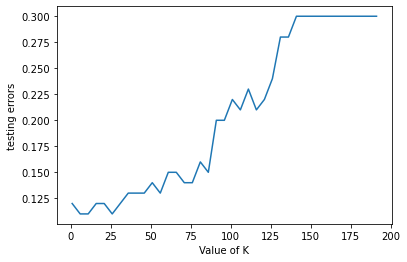

In [140]:
# Manhattan Distance
dist = DistanceMetric.get_metric('euclidean')
knn_predict=knn.predict(X_testing)

k_range = range(1, 196, 5)
# k_range = range(1, 11, 5)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform',algorithm='auto',leaf_size=30, p= 1,metric_params=None,n_jobs=None)
    knn.fit(X_training,y_training)
#     scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # for classification
    a = knn.score(X_testing, y_testing)
    k_scores.append(1-a)

# k_scores_2=DataFrame(k_scores)
# x = k_scores_2.idxmin()  
# print(x)

# a=min(k_scores)
# b=k_range[k_scores.index(min(k_scores))]
frame_1.loc['1','the best k value'] = k_range[k_scores.index(min(k_scores))]
frame_1.loc['1','testing error'] = min(k_scores)
print(frame_1)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('testing errors')
plt.show()



# the best k is 6 and 11

1(d)iB find the the best log10(p)

0.10999999999999999


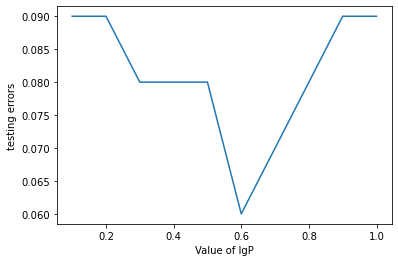

In [143]:
#  1(d)iB, k* == 6
# knn = KNeighborsClassifier(n_neighbors = 6)

x_range = arange(0.1, 1.1, 0.1)
scores = []
for x in x_range:
    np.power(10,x)
    knn = KNeighborsClassifier(n_neighbors=6, weights='uniform',algorithm='auto', leaf_size=30,p=np.power(10,x), metric='minkowski',metric_params=None,n_jobs=None)
    knn.fit(X_training,y_training)
#     knn.predict(X_testing)[0:5]
    knn_predict=knn.predict(X_testing)
    a = knn.score(X_testing, y_testing)
    scores.append(1-a)

testing_error = min(k_scores)
print(testing_error)

plt.plot(x_range, scores)
plt.xlabel('Value of lgP')
plt.ylabel('testing errors')
plt.show()

# when k = 6, the best lg(p) is 0.6. And the testing error is still 0.11.

  the best k value testing error
1                6          0.11
2               16          0.08
3              NaN           NaN


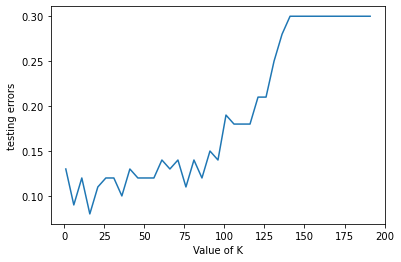

In [144]:
#  1(d)iC
# Chebyshev Distance

k_range = range(1, 196, 5)
#k_range = range(1, 25, 1)
k_scores = []
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform',algorithm='auto', leaf_size=30, metric='chebyshev',metric_params=None,n_jobs=None)
    knn.fit(X_training,y_training)
    a = knn.score(X_testing, y_testing)
    k_scores.append(1-a)

frame_1.loc['2','the best k value'] = k_range[k_scores.index(min(k_scores))]
frame_1.loc['2','testing error'] = min(k_scores)
print(frame_1)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('testing errors')
plt.show()
# the best k is 16. The testing error is 0.08

In [145]:
knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis',metric_params={'V':np.cov(X_training,rowvar=False)})
knn.fit(X_training,y_training)

KNeighborsClassifier(metric='mahalanobis',
                     metric_params={'V': array([[ 278.81221943,   90.57590441,  206.37879688,  188.22888969,
         -33.53821939,  433.66445961],
       [  90.57590441,   83.37003551,   58.06773113,    7.20410185,
           2.39286846,  115.45315492],
       [ 206.37879688,   58.06773113,  285.44816065,  148.30472387,
          -1.91695705,  299.19917116],
       [ 188.22888969,    7.20410185,  148.30472387,  181.01915813,
         -35.93236146,  318.20856922],
       [ -33.53821939,    2.39286846,   -1.91695705,  -35.93236146,
         131.00287771,    3.52594692],
       [ 433.66445961,  115.45315492,  299.19917116,  318.20856922,
           3.52594692, 1580.03617726]])},
                     n_neighbors=191)

  the best k value testing error
1                6          0.11
2               16          0.08
3                6          0.08


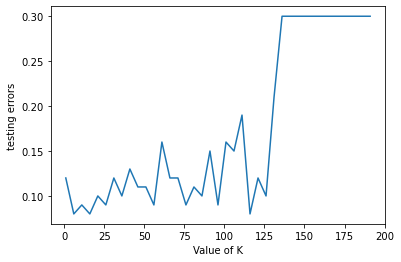

In [147]:
#  1(d)ii
# mahalanobis Distance

k_range = range(1, 196, 5)
# k_range = range(1, 25, 1)
k_scores = []
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis',metric_params={'VI':np.cov(X_training,rowvar=False)})
    knn.fit(X_training,y_training)
    a = knn.score(X_testing, y_testing)
    k_scores.append(1-a)

frame_1.loc['3','the best k value'] = k_range[k_scores.index(min(k_scores))]
frame_1.loc['3','testing error'] = min(k_scores)
print(frame_1)  

plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('testing errors')
plt.show()
# the best k is 6. The testing error is 0.08.

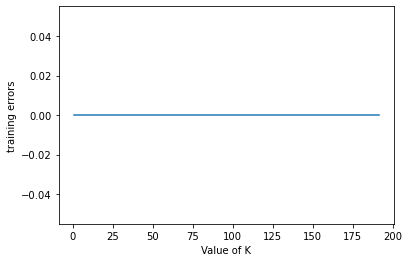

In [106]:
# e

k_range = range(1, 196, 5)
# k_range = range(1, 25, 5)
k_scores = []
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance',algorithm='auto', leaf_size=30,metric_params=None,n_jobs=None)
    knn.fit(X_training,y_training)
    a = knn.score(X_training, y_training)
    k_scores.append(1-a)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('training errors')
plt.show()
# the best k is 6.

References:

pairplot: https://zhuanlan.zhihu.com/p/98729226

General principles for using color in plots https://seaborn.pydata.org/tutorial/color_palettes.html

Seaborn sns.boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Seaborn boxplot: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 

choose training data https://blog.csdn.net/qq_22210253/article/details/85229887

pandas.concat();Splicing rows, https://www.gairuo.com/p/pandas-concat

k-nearest neighbors https://www.cnblogs.com/csj007523/p/7794425.html

KNN: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://www.bioinfo-scrounger.com/archives/728/

https://zhuanlan.zhihu.com/p/143092725

confusion matrix https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

sklearn.metrics.f1_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

knn.score: https://stackoverflow.com/questions/58765373/explanation-of-the-parameters-of-knn-score